In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import subprocess
import numpy as np
import uproot
import sys
import awkward as ak
from scipy.signal import find_peaks
import mplhep as hep
hep.style.use('ATLAS')  # or ATLAS/LHCb2

In [2]:
arg = 'rec.mu2e.CRV_wideband_cosmics.CRVWB-000-001-000.root'
# Execute the shell script with argument
filelist = subprocess.check_output(['./getDataset.sh', arg], universal_newlines=True)
filelist = filelist.splitlines()

In [3]:
goodruns=[1361, 1364, 1365] # Select LED runs with bias set to 0x600, 0x680 and 0x700
goodruns=[str(x).zfill(6) for x in goodruns]

def select_good_runs(goodruns, allruns):
    return [item for item in allruns if any(goodruns in item for goodruns in goodruns)]
good_run_list=select_good_runs(goodruns, filelist)

In [4]:
good_run_list_xroot=[]
for root_file in good_run_list:
    root_file = 'root://fndca1.fnal.gov'+root_file[:5]+'/fnal.gov/usr/'+root_file[6:]            
    good_run_list_xroot.append(root_file)

In [5]:
file_list = ["{}{}".format(i,":run") for i in good_run_list_xroot]
arr = uproot.concatenate(file_list, 
                         filter_name=["time", "PEs", "temperature", "beta"], 
                         xrootdsource={"timeout": 360})

security protocol 'ztn' disallowed for non-TLS connections.


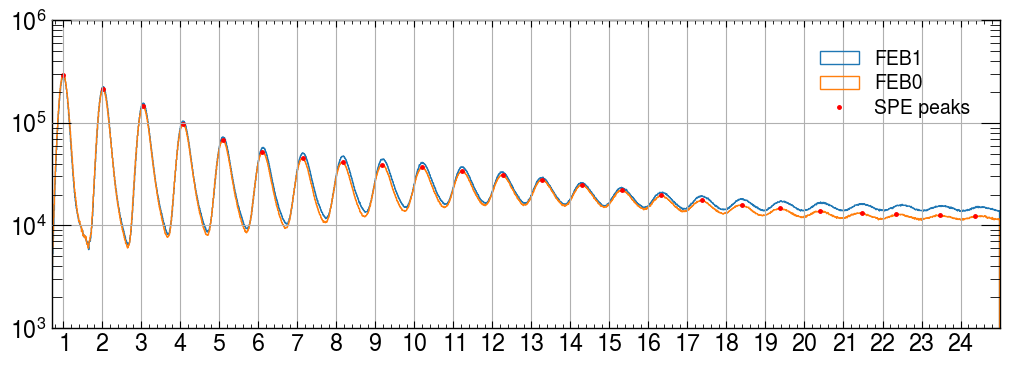

In [6]:
fig = plt.figure(figsize=[12,4])
ax = fig.gca()
ax.set_xticks(np.arange(0, 25, 1))
plt.hist(ak.flatten(arr['PEs'][:,0]), histtype='step', bins=2000, range=(0.7, 25), label="FEB1"); #FEB1
hist, bins, _ = plt.hist(ak.flatten(arr['PEs'][:,1]), histtype='step', bins=2000, range=(0.7, 25), label="FEB0"); #FEB0
peaks, _ = find_peaks(hist, width=10)
plt.plot(bins[peaks], hist[peaks], "r.", markersize=5, label="SPE peaks")

plt.yscale('log')
plt.grid()
plt.legend();

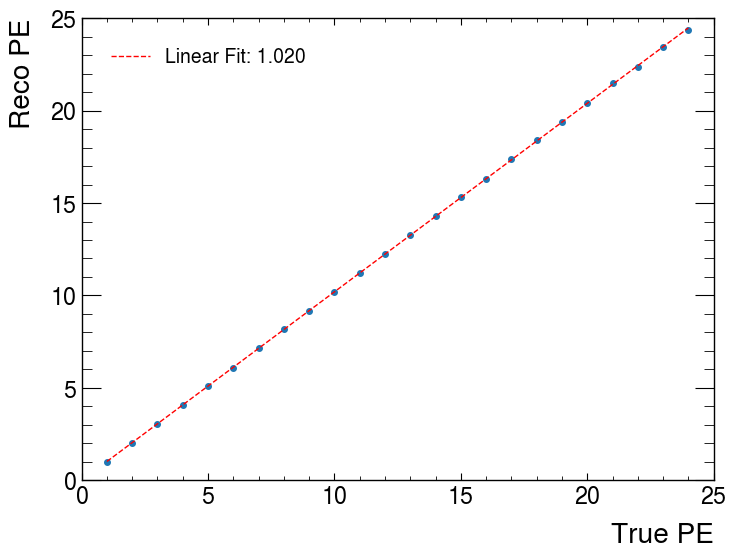

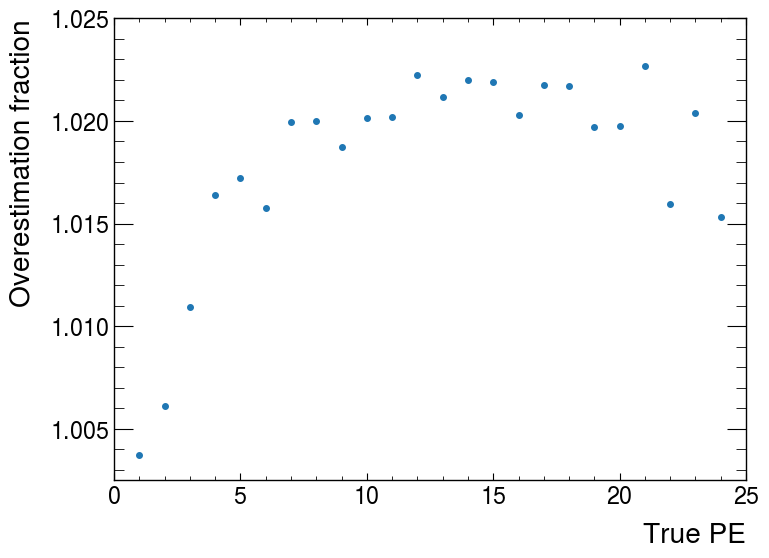

In [7]:
y=bins[peaks]
x=range(1,len(y)+1)
plt.plot(x, y, '.');
m, b = np.polyfit(x, y, deg=1)

line = m * x + b
plt.plot(x, line, '--r', linewidth=1, label='Linear Fit: %0.3f'%m)
plt.xlabel("True PE")
plt.ylabel("Reco PE")
plt.legend();
plt.ylim(0,25)

plt.figure()
plt.plot(x, y/x, '.');
plt.xlabel("True PE")
plt.ylabel("Overestimation fraction");
